In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Load the oil production statistics CSV
oil_production = pd.read_csv("../data/oil-production-statistics-cleaned_data.csv")

# Load the other CSV with price data
price_data = pd.read_csv("../data/crude-oil-Cleaned.csv") 

# Load the second CSV file (containing country names, codes, and 2021 data)
country_data = pd.read_csv("../data/unemployment analysis.csv")

In [3]:
# Select relevant columns from the second CSV
country_data = country_data[['Country Name', 'Country Code', '2021']]

# Rename the '2021' column for clarity
country_data.rename(columns={'2021': 'country_value'}, inplace=True)

In [4]:
# Merge the DataFrames based on the 'year' column
merged_df = pd.merge(oil_production, price_data, on='year', how='left')


In [5]:
# Merge the two DataFrames based on 'country_name'
merged_df = pd.merge(merged_df, country_data, left_on='country_name', right_on='Country Name', how='left')

In [6]:
# Print the merged DataFrame
print(merged_df)

        country_name     type            product                    flow  \
0          Australia  Balance          Crude oil   Industrial Production   
1          Australia  Balance          Crude oil   Industrial Production   
2          Australia  Balance          Crude oil   Industrial Production   
3          Australia  Balance          Crude oil   Industrial Production   
4          Australia  Balance          Crude oil   Industrial Production   
...              ...      ...                ...                     ...   
27979  United States  Balance  Residual fuel oil  Storage Channelization   
27980  United States  Balance  Residual fuel oil  Storage Channelization   
27981  United States  Balance  Residual fuel oil  Storage Channelization   
27982  United States  Balance  Residual fuel oil  Storage Channelization   
27983  United States  Balance  Residual fuel oil  Storage Channelization   

       year      value  price  percentChange  change   price_ma  month  \
0      2021  

In [7]:
# Save the merged DataFrame to a new CSV file
merged_df.to_csv("../data/merged_oil_data.csv", index=False)

EDA

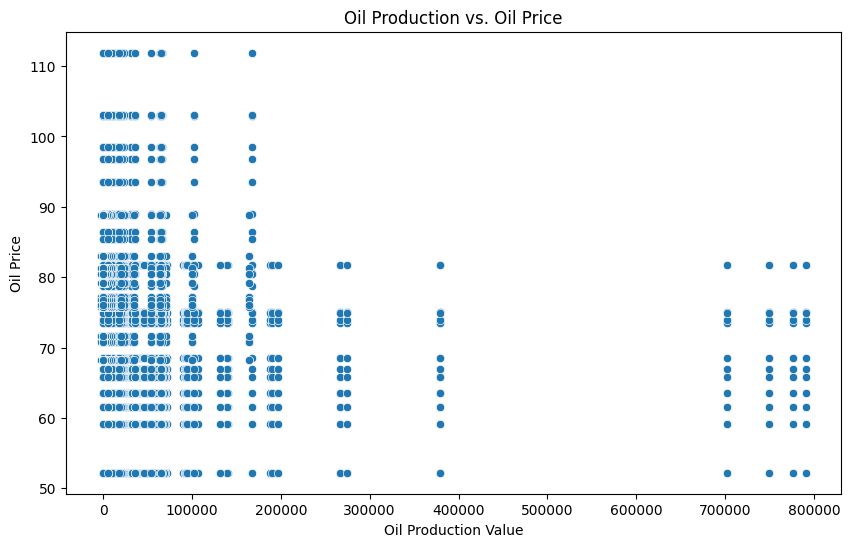

In [8]:
# 1. Oil Production vs. Oil Price
plt.figure(figsize=(10, 6))
sns.scatterplot(x='value', y='price', data=merged_df)
plt.title('Oil Production vs. Oil Price')
plt.xlabel('Oil Production Value')
plt.ylabel('Oil Price')
plt.show()

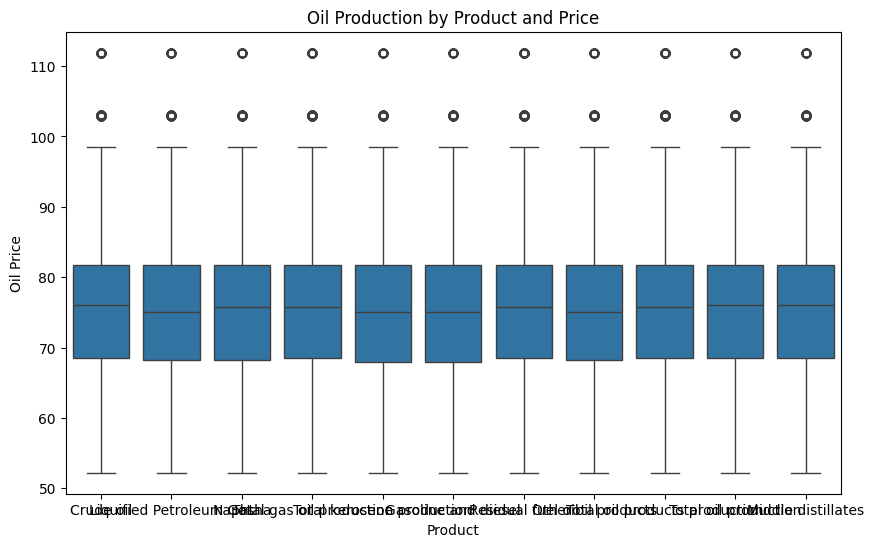

In [9]:
# 2. Oil Production by Product and Price
plt.figure(figsize=(10, 6))
sns.boxplot(x='product', y='price', data=merged_df)
plt.title('Oil Production by Product and Price')
plt.xlabel('Product')
plt.ylabel('Oil Price')
plt.show()

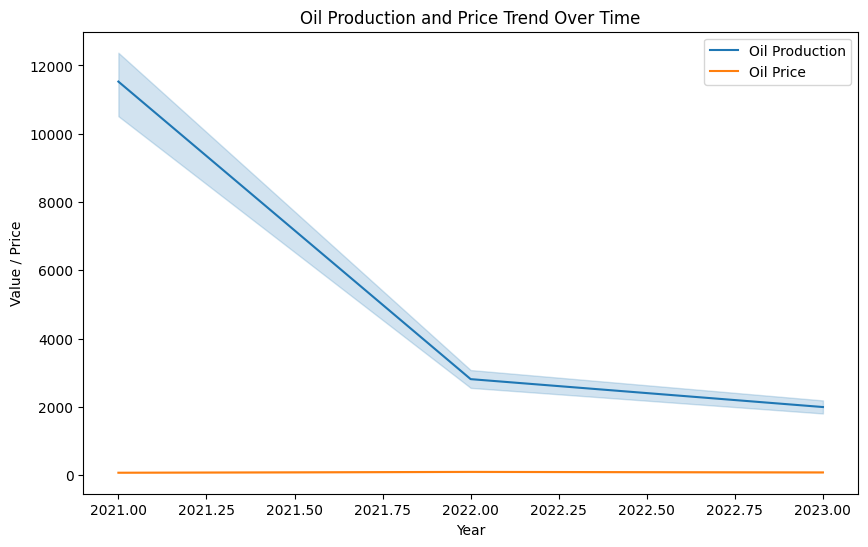

In [10]:
# 3. Oil Production Trend and Price Trend Over Time
plt.figure(figsize=(10, 6))
sns.lineplot(x='year', y='value', data=merged_df, label='Oil Production')
sns.lineplot(x='year', y='price', data=merged_df, label='Oil Price')
plt.title('Oil Production and Price Trend Over Time')
plt.xlabel('Year')
plt.ylabel('Value / Price')
plt.legend()
plt.show()


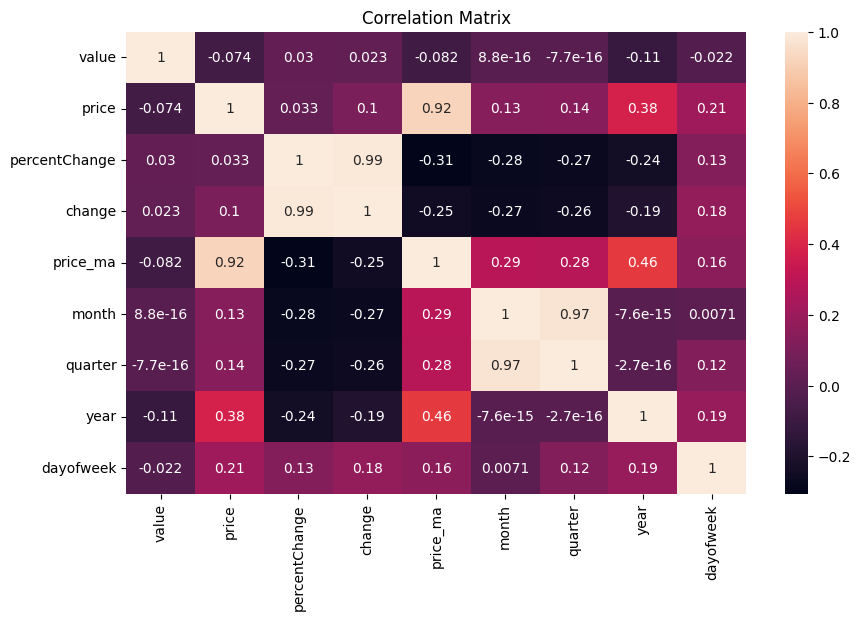

In [11]:
# Select only numerical columns for correlation
numerical_cols = ['value', 'price', 'percentChange', 'change', 'price_ma', 'month', 'quarter', 'year', 'dayofweek']
merged_df_numeric = merged_df[numerical_cols]

# 4. Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = merged_df_numeric.corr()  # Use only numerical columns
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()


<Figure size 1200x600 with 0 Axes>

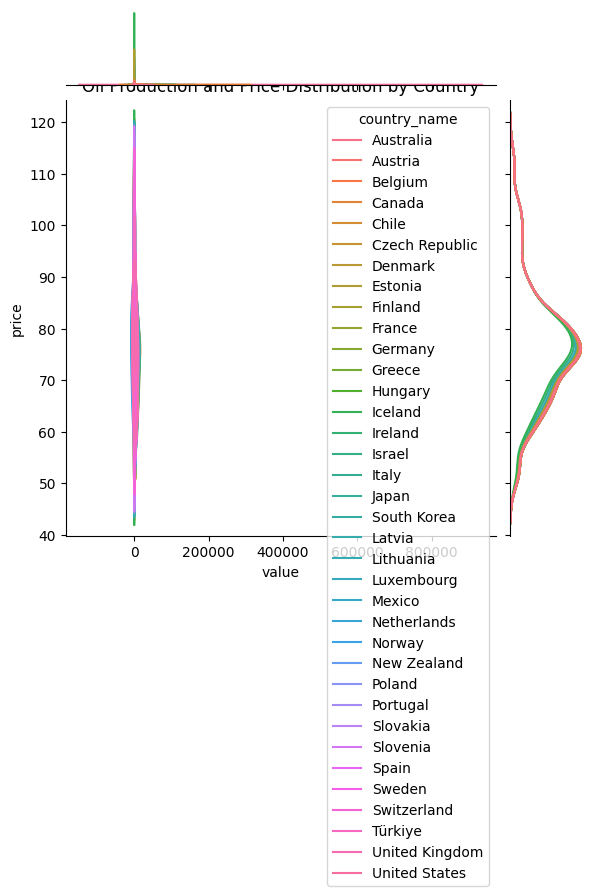

In [12]:
# 5. Oil Production and Price Distribution by Country
plt.figure(figsize=(12, 6))
sns.jointplot(x='value', y='price', data=merged_df, kind='kde', hue='country_name')
plt.title('Oil Production and Price Distribution by Country')
plt.show()

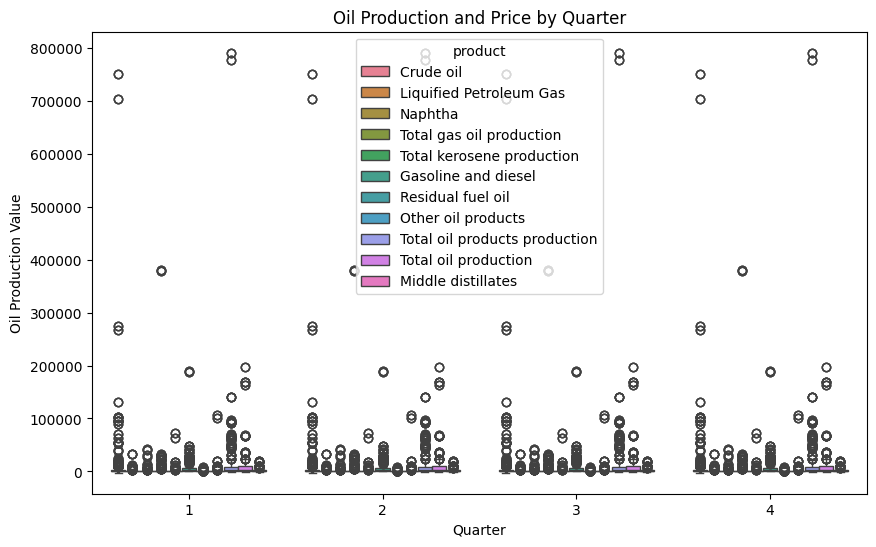

In [13]:
# 6. Oil Production and Price by Quarter
plt.figure(figsize=(10, 6))
sns.boxplot(x='quarter', y='value', data=merged_df, hue='product')
plt.title('Oil Production and Price by Quarter')
plt.xlabel('Quarter')
plt.ylabel('Oil Production Value')
plt.show()

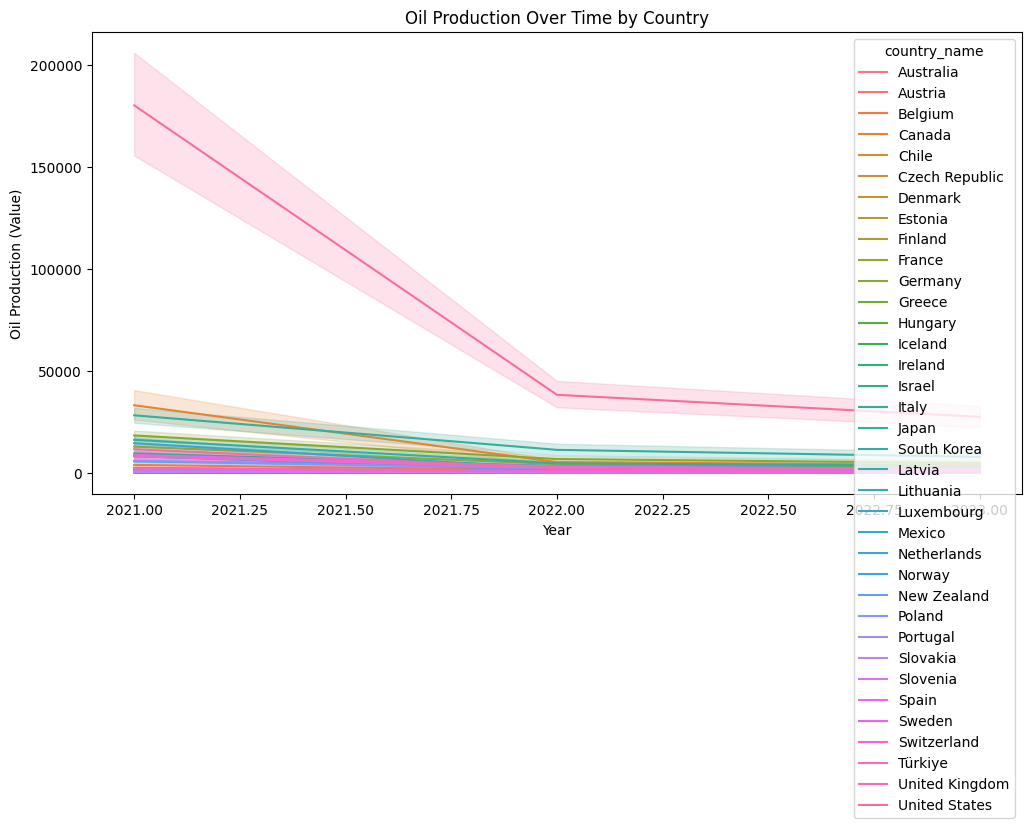

In [14]:
#  Time Series Plots
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='value', data=merged_df, hue='country_name')
plt.title('Oil Production Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Oil Production (Value)')
plt.show()

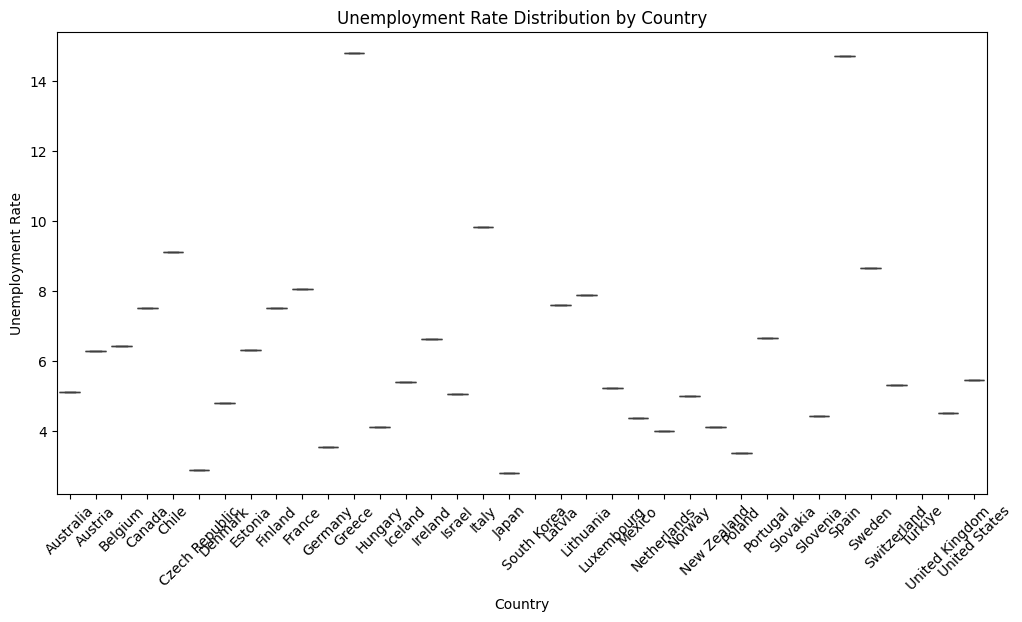

In [15]:
#  Box Plots for Unemployment Rate by Country
plt.figure(figsize=(12, 6))
sns.boxplot(x='country_name', y='country_value', data=merged_df)
plt.title('Unemployment Rate Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

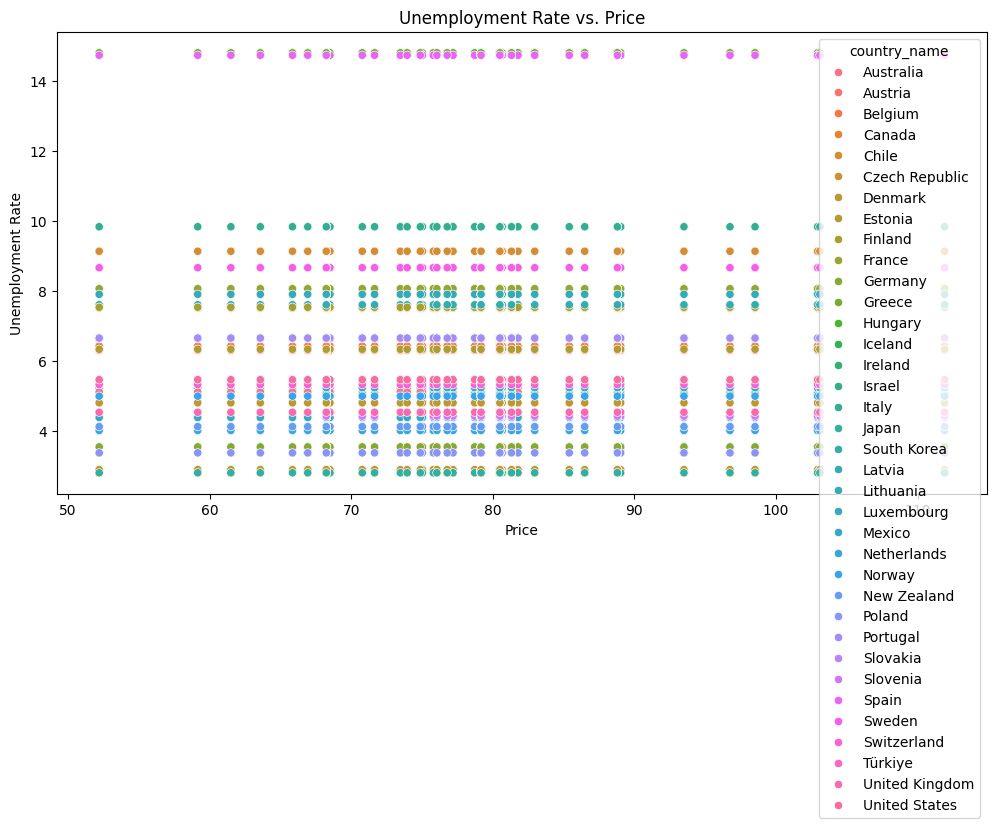

In [17]:
#  Scatter Plot of Unemployment Rate vs. Price
plt.figure(figsize=(12, 6))
sns.scatterplot(x='price', y='country_value', data=merged_df, hue='country_name')
plt.title('Unemployment Rate vs. Price')
plt.xlabel('Price')
plt.ylabel('Unemployment Rate')
plt.show()

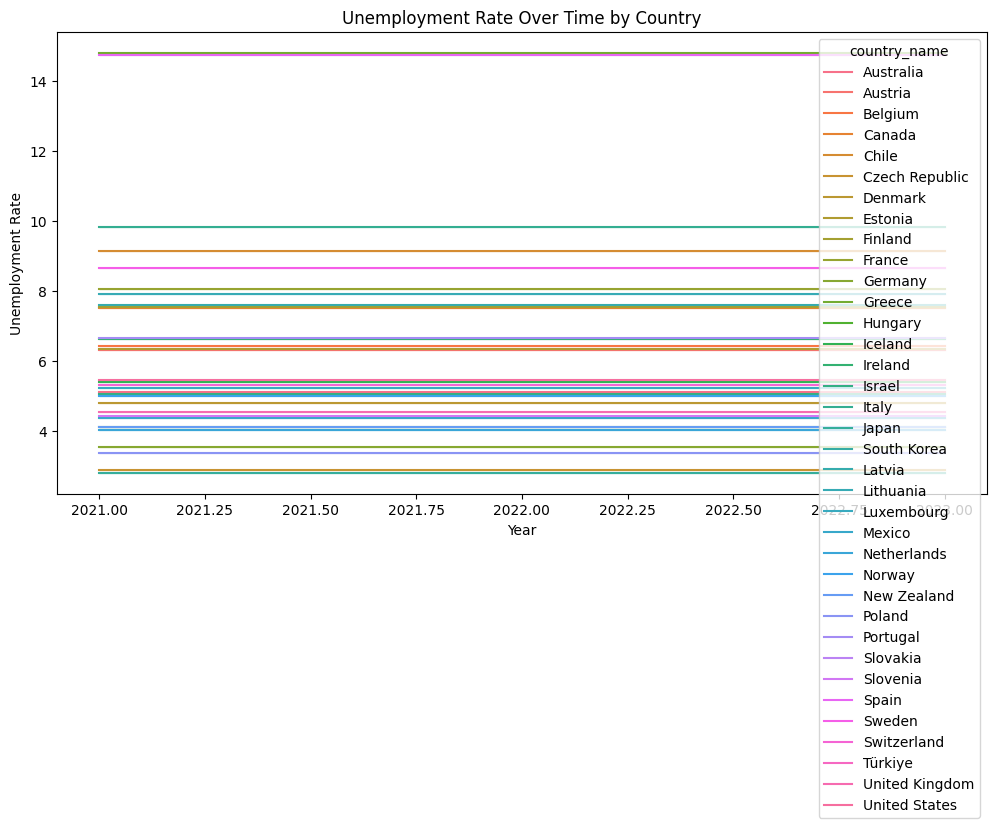

In [19]:
#  Line Chart for Unemployment Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='country_value', data=merged_df, hue='country_name')
plt.title('Unemployment Rate Over Time by Country')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate')
plt.show()

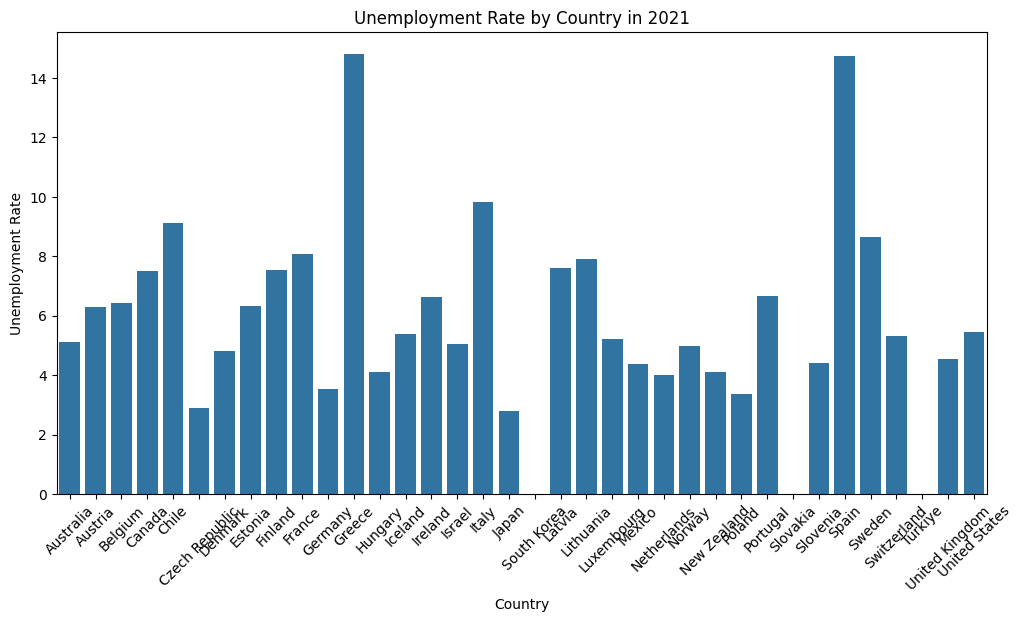

In [20]:
#Bar Chart for Unemployment Rate by Country 
year_to_plot = 2021  
data_year = merged_df[merged_df['year'] == year_to_plot]

plt.figure(figsize=(12, 6))
sns.barplot(x='country_name', y='country_value', data=data_year)
plt.title(f'Unemployment Rate by Country in {year_to_plot}')
plt.xlabel('Country')
plt.ylabel('Unemployment Rate')
plt.xticks(rotation=45)
plt.show()

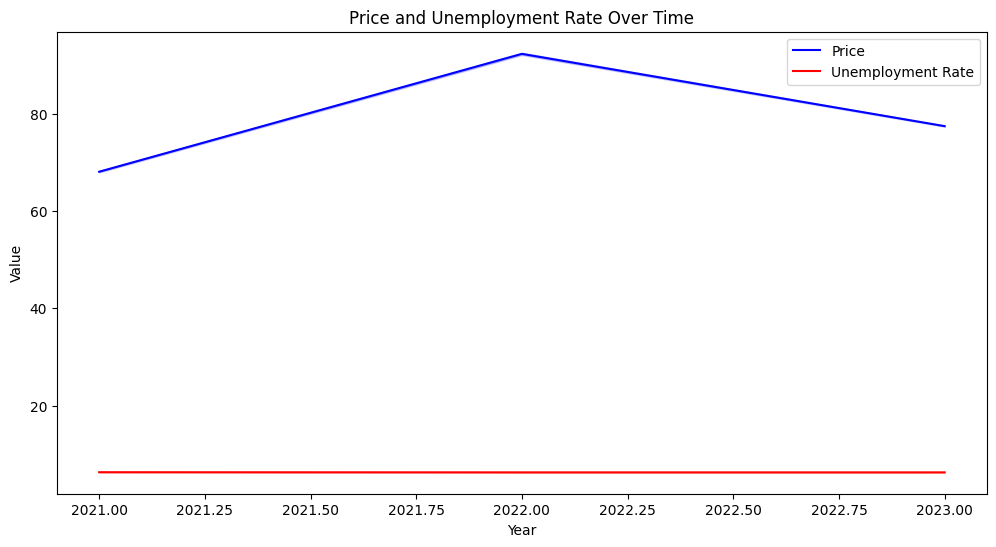

In [21]:
#Line Chart for Price and Unemployment Rate Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='year', y='price', data=merged_df, label='Price', color='blue')
sns.lineplot(x='year', y='country_value', data=merged_df, label='Unemployment Rate', color='red')
plt.title('Price and Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()

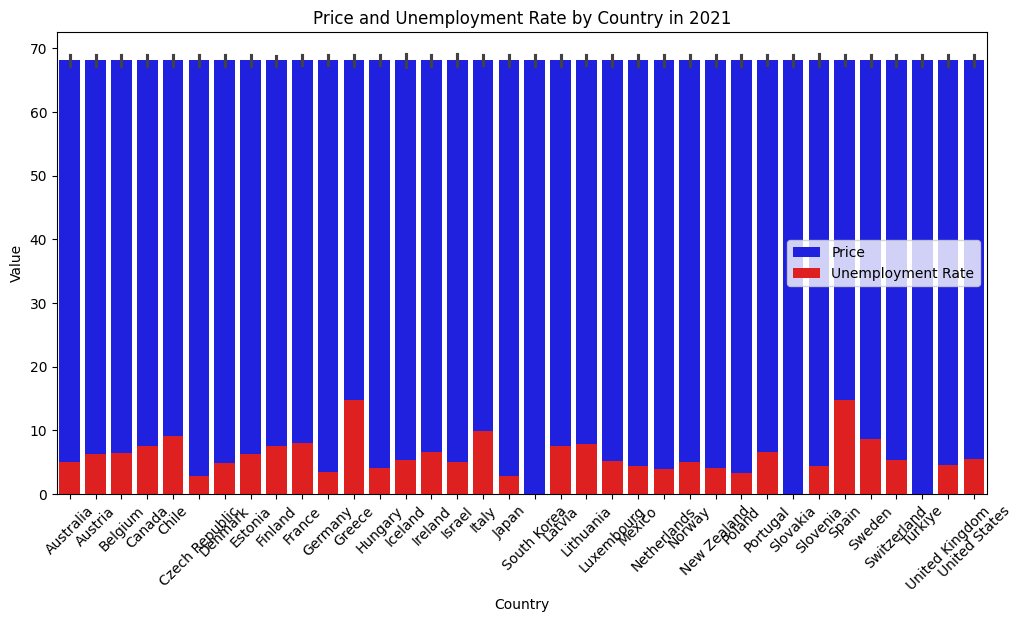

In [22]:
#Bar Chart for Price and Unemployment Rate by Country 
year_to_plot = 2021  
data_year = merged_df[merged_df['year'] == year_to_plot]

plt.figure(figsize=(12, 6))
sns.barplot(x='country_name', y='price', data=data_year, label='Price', color='blue')
sns.barplot(x='country_name', y='country_value', data=data_year, label='Unemployment Rate', color='red')
plt.title(f'Price and Unemployment Rate by Country in {year_to_plot}')
plt.xlabel('Country')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.show()